In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Making a dataframe
bakery_data = pd.read_csv('BreadBasket_DMS.csv', 
                          parse_dates=[['Date', 'Time']]
                         )
bakery_data.head()

,Date_Time,Transaction,Item
0,2016-10-30 09:58:11,1,Bread
1,2016-10-30 10:05:34,2,Scandinavian
2,2016-10-30 10:05:34,2,Scandinavian
3,2016-10-30 10:07:57,3,Hot chocolate
4,2016-10-30 10:07:57,3,Jam


### Initial Experiment ideas 
1. Not putting an item out until a certain time of day
2. Not selling a certain item at all




In [3]:
bakery_data.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [4]:
# There are a lot of transactions to parse through, 
# it may be worthwhile to limit based on item.
items = bakery_data.Item.unique()

In [5]:
print(items)

['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry shortbread sandwich'

In [69]:
len(bakery_data.Item.unique())

95

In [70]:
items[0]

'Bread'

In [72]:
# Could use pandas value counts, doing it by hand for experience.
counts = {}

for i in range(0,95):
    count = 0
    for item in bakery_data.Item:
        if items[i] == item:
            count = count + 1
    counts[items[i]] = count
    
print(counts)
#type(counts)


{'Bread': 3325, 'Scandinavian': 277, 'Hot chocolate': 590, 'Jam': 149, 'Cookies': 540, 'Muffin': 370, 'Coffee': 5471, 'Pastry': 856, 'Medialuna': 616, 'Tea': 1435, 'NONE': 786, 'Tartine': 47, 'Basket': 6, 'Mineral water': 136, 'Farm House': 374, 'Fudge': 159, 'Juice': 369, "Ella's Kitchen Pouches": 17, 'Victorian Sponge': 7, 'Frittata': 81, 'Hearty & Seasonal': 107, 'Soup': 342, 'Pick and Mix Bowls': 12, 'Smoothies': 77, 'Cake': 1025, 'Mighty Protein': 11, 'Chicken sand': 1, 'Coke': 185, 'My-5 Fruit Shoot': 18, 'Focaccia': 54, 'Sandwich': 771, 'Alfajores': 369, 'Eggs': 28, 'Brownie': 379, 'Dulce de Leche': 13, 'Honey': 6, 'The BART': 1, 'Granola': 28, 'Fairy Doors': 2, 'Empanadas': 7, 'Keeping It Local': 63, 'Art Tray': 38, 'Bowl Nic Pitt': 2, 'Bread Pudding': 4, 'Adjustment': 1, 'Truffles': 193, 'Chimichurri Oil': 2, 'Bacon': 1, 'Spread': 2, 'Kids biscuit': 12, 'Siblings': 2, 'Caramel bites': 3, 'Jammie Dodgers': 125, 'Tiffin': 146, 'Olum & polenta': 1, 'Polenta': 1, 'The Nomad': 58, 

In [30]:
# Making it more pythonic
import operator
sorted_counts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
sorted_counts

[('Coffee', 5471),
 ('Bread', 3325),
 ('Tea', 1435),
 ('Cake', 1025),
 ('Pastry', 856),
 ('NONE', 786),
 ('Sandwich', 771),
 ('Medialuna', 616),
 ('Hot chocolate', 590),
 ('Cookies', 540),
 ('Brownie', 379),
 ('Farm House', 374),
 ('Muffin', 370),
 ('Juice', 369),
 ('Alfajores', 369),
 ('Soup', 342),
 ('Scone', 327),
 ('Toast', 318),
 ('Scandinavian', 277),
 ('Truffles', 193),
 ('Coke', 185),
 ('Spanish Brunch', 172),
 ('Fudge', 159),
 ('Baguette', 152),
 ('Jam', 149),
 ('Tiffin', 146),
 ('Mineral water', 136),
 ('Jammie Dodgers', 125),
 ('Chicken Stew', 123),
 ('Hearty & Seasonal', 107),
 ('Salad', 99),
 ('Frittata', 81),
 ('Smoothies', 77),
 ('Keeping It Local', 63),
 ('The Nomad', 58),
 ('Focaccia', 54),
 ('Vegan mincepie', 54),
 ('Bakewell', 48),
 ('Tartine', 47),
 ('Afternoon with the baker', 44),
 ('Art Tray', 38),
 ('Extra Salami or Feta', 38),
 ('Eggs', 28),
 ('Granola', 28),
 ('Tshirt', 21),
 ('My-5 Fruit Shoot', 18),
 ("Ella's Kitchen Pouches", 17),
 ('Vegan Feast', 16),
 ('C

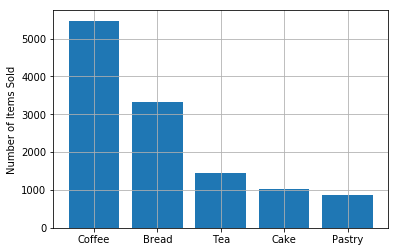

In [60]:
# Turn my list of tuples into a dictionary of the top 5 items. 
sorted_counts2 = dict(sorted_counts[0:5])

# Plotting set up.
fig, ax = plt.subplots()
y = sorted_counts2.values()
x = range(0, len(y))

# Making xticks from my list of tuples.
my_xticks = [num[0] for num in sorted_counts]
my_xticks = my_xticks[0:5]

plt.xticks(x, my_xticks)
plt.bar(x, y)
plt.grid(True)
ax.set_ylabel('Number of Items Sold')
plt.show()

### We can see that coffee and bread make up the largest number of transactions for all of our items sold at the bakery. We will focus on bread, even though coffee is the most sold item. This is because the cost to produce bread is higher, making waste due to overproduction most detrimental to our revenue.

### We will examine bread sales further.

In [61]:
# Creating a new DF with only transactions involving bread
alist = ['Bread']

df = bakery_data[bakery_data['Item'].isin(alist)]

df.head()

,Date_Time,Transaction,Item
0,2016-10-30 09:58:11,1,Bread
9,2016-10-30 10:13:03,5,Bread
18,2016-10-30 10:20:51,8,Bread
19,2016-10-30 10:21:59,9,Bread
23,2016-10-30 10:27:21,11,Bread


In [62]:
# Changing the index to Transaction 
df = df.set_index('Transaction')

df.head()

,Date_Time,Item
Transaction,,
1,2016-10-30 09:58:11,Bread
5,2016-10-30 10:13:03,Bread
8,2016-10-30 10:20:51,Bread
9,2016-10-30 10:21:59,Bread
11,2016-10-30 10:27:21,Bread


In [63]:
# Descriptive statistics for bread sales
df.Date_Time.dt.hour.describe()

count    3325.000000
mean       11.869774
std         2.333803
min         1.000000
25%        10.000000
50%        12.000000
75%        14.000000
max        19.000000
Name: Date_Time, dtype: float64

Text(0,0.5,'Number of Transactions')

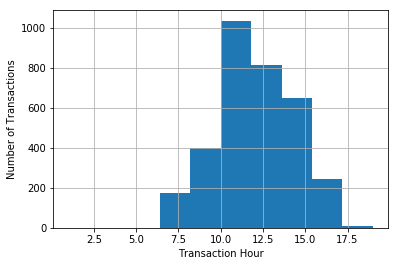

In [65]:
# Making a histogram to show the distribution
# of transaction hours for bread

fig, ax = plt.subplots()

df.Date_Time.dt.hour.hist()
ax.set_xlabel('Transaction Hour')
ax.set_ylabel('Number of Transactions')

### We see that there are 3,325 bread sales in our dataset, with a mean transaction hour of 11.8 which is about noon. We also see that the range in sale hour is wide, from 1am to 7pm. While the distribution of transaction hours is slightly skewed left, we feel the distribution is Gaussian enough to proceed without removing outliers. 

### One standard deviation is 2.3 hours, while two would be 4.6 hours. We can probably reduce the hours we sell bread to within 2 standard deviations of our mean sale hour and retain most of the business; 95% of bread sales to be precise.


## Null Hypothesis (H_0): 
There will be no difference in revenue related to bread sales for a bakery that sells bread outside the hours of 9:30am - 2pm and bakeries who do not.
## Hypothesis (H_1): 
There will be a difference in revenue related to bread sales for bakeries that sell bread outside the hours of 9:30am - 2pm and bakeries who do not.
## Experiment: 
At the beginning of the month the bakery will begin tracking how much bread is thrown out each day and will conduct business as normal for 30 days. For the next 30 days the same data will be tracked, but the bakery will limit the availability of bread to between 9:30am and 2pm. At the end of the two months the revenue related to sales of bread for each month will be compared. We will also examine the cost of waste, and factor that into the total revenue. We will test if there is a significant difference in revenue. If we are successful we will see a significant increase in revenue supported by a p-value < 0.05.
